In [156]:
import pandas as pd 
import numpy as np 
import seaborn  as sns 
import  matplotlib.pyplot as plt 
import sklearn as sk 
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [157]:
df=pd.DataFrame()

In [158]:
df['X1']=[1,2,3,4,5,6,6,7,9,9]
df['X2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]
alphas=[]

In [159]:
df 

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

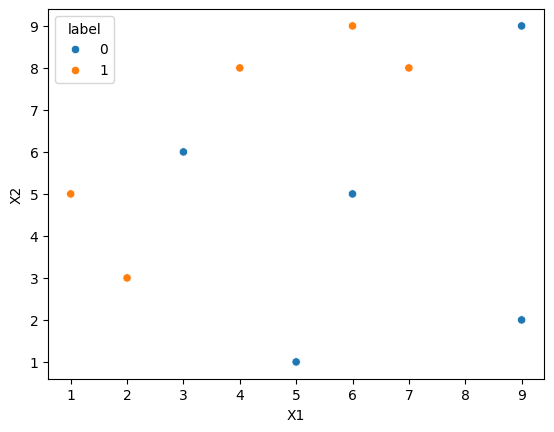

In [160]:
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [161]:
df['weights']=1/df.shape[0]
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [162]:
df 

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [163]:
clf=DecisionTreeClassifier(max_depth=1)
x=df.iloc[:,:2]
y=df['label']

In [164]:
x 

,X1,X2
0,1,5
1,2,3
2,3,6
3,4,8
4,5,1
5,6,9
6,6,5
7,7,8
8,9,9
9,9,2


In [165]:
y 

0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    1
8    0
9    0
Name: label, dtype: int64

In [166]:
clf.fit(x,y)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

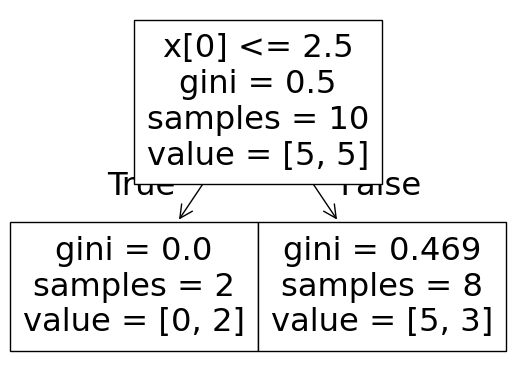

In [167]:
plot_tree(clf)

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


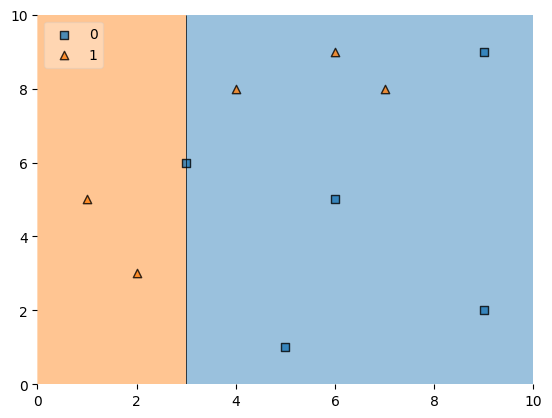

In [168]:
plot_decision_regions(np.array(x),np.array(y),clf=clf,legend=2 )
plt.savefig('CLF1.png')

In [169]:
df['y_pred']=clf.predict(x)

In [170]:
df 

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [171]:
misclassified = df[df['label'] != df['y_pred']].copy()
wellclassified=df[df['label']==df['y_pred']].copy()
print(misclassified)
print('\n--------Classified-----------\n')
print(wellclassified)

   X1  X2  label  weights  y_pred
3   4   8      1      0.1       0
5   6   9      1      0.1       0
7   7   8      1      0.1       0

--------Classified-----------

   X1  X2  label  weights  y_pred
0   1   5      1      0.1       1
1   2   3      1      0.1       1
2   3   6      0      0.1       0
4   5   1      0      0.1       0
6   6   5      0      0.1       0
8   9   9      0      0.1       0
9   9   2      0      0.1       0


In [172]:
def classification(df):
    misclassified = df[df['label'] != df['y_pred']].copy()
    wellclassified=df[df['label']==df['y_pred']].copy()
    print(misclassified)
    print('\n--------Classified-----------\n')
    print(wellclassified)
    return misclassified,wellclassified
misclassified,wellclassified=classification(df)

   X1  X2  label  weights  y_pred
3   4   8      1      0.1       0
5   6   9      1      0.1       0
7   7   8      1      0.1       0

--------Classified-----------

   X1  X2  label  weights  y_pred
0   1   5      1      0.1       1
1   2   3      1      0.1       1
2   3   6      0      0.1       0
4   5   1      0      0.1       0
6   6   5      0      0.1       0
8   9   9      0      0.1       0
9   9   2      0      0.1       0


In [173]:
def calculate_weight(misclassified, wellclassified):
    misclassified = misclassified.copy()
    wellclassified = wellclassified.copy()

    total_error_weight = misclassified['weights'].sum()
    total_say = 0.5 * np.log((1 - total_error_weight) / total_error_weight+0.000000001)
    print('Total Say=',total_say)
    # Misclassified weights updated with e^+α
    misclassified['new_weights'] = misclassified['weights'] * np.exp(total_say)

    # Well-classified weights updated with e^-α
    wellclassified['new_weights'] = wellclassified['weights'] * np.exp(-total_say)

    return misclassified, wellclassified, total_say

misclassified, wellclassified , alpha1= calculate_weight(misclassified, wellclassified)
alphas.append(alpha1)

Total Say= 0.4236489304078875


In [174]:
misclassified

,X1,X2,label,weights,y_pred,new_weights
3,4,8,1,0.1,0,0.152753
5,6,9,1,0.1,0,0.152753
7,7,8,1,0.1,0,0.152753


In [175]:
wellclassified

,X1,X2,label,weights,y_pred,new_weights
0,1,5,1,0.1,1,0.065465
1,2,3,1,0.1,1,0.065465
2,3,6,0,0.1,0,0.065465
4,5,1,0,0.1,0,0.065465
6,6,5,0,0.1,0,0.065465
8,9,9,0,0.1,0,0.065465
9,9,2,0,0.1,0,0.065465


In [176]:
def merge_cls(misclassified,wellclassified): 
    misclassified,wellclassified,alpha1=calculate_weight(misclassified,wellclassified)
    df_classified=pd.concat([misclassified,wellclassified],axis=0)
    df_classified= df_classified.sort_index(ascending=True)
    df_classified=df_classified[['X1','X2','weights','y_pred','new_weights','label']]
    return df_classified

df_classified=merge_cls(misclassified,wellclassified)

Total Say= 0.4236489304078875


In [177]:
df_classified

,X1,X2,weights,y_pred,new_weights,label
0,1,5,0.1,1,0.065465,1
1,2,3,0.1,1,0.065465,1
2,3,6,0.1,0,0.065465,0
3,4,8,0.1,0,0.152753,1
4,5,1,0.1,0,0.065465,0
5,6,9,0.1,0,0.152753,1
6,6,5,0.1,0,0.065465,0
7,7,8,0.1,0,0.152753,1
8,9,9,0.1,0,0.065465,0
9,9,2,0.1,0,0.065465,0


In [178]:
def normalize_weights(misclassified,wellclassified):
    df_classified=merge_cls(misclassified,wellclassified)
    w_total_new_weights = df_classified['new_weights'].sum()

    # Normalize new_weights
    df_classified['normalized_weights'] = df_classified['new_weights'] / w_total_new_weights

    # print("----- Misclassified -----")
    # print(misclassified)
    # print("----- Well-classified -----")
    # print(wellclassified)
    return df_classified


df_classified = normalize_weights(misclassified, wellclassified)

Total Say= 0.4236489304078875


In [179]:
df_classified

,X1,X2,weights,y_pred,new_weights,label,normalized_weights
0,1,5,0.1,1,0.065465,1,0.071429
1,2,3,0.1,1,0.065465,1,0.071429
2,3,6,0.1,0,0.065465,0,0.071429
3,4,8,0.1,0,0.152753,1,0.166667
4,5,1,0.1,0,0.065465,0,0.071429
5,6,9,0.1,0,0.152753,1,0.166667
6,6,5,0.1,0,0.065465,0,0.071429
7,7,8,0.1,0,0.152753,1,0.166667
8,9,9,0.1,0,0.065465,0,0.071429
9,9,2,0.1,0,0.065465,0,0.071429


In [180]:
def new_dataframe(misclassified,wellclassified):
    df_classified=normalize_weights(misclassified,wellclassified)
    df_classified.drop(columns=['weights','y_pred','new_weights'],inplace=True)
    df_classified['weights']=df_classified['normalized_weights']
    df_classified.drop(columns=['normalized_weights'],inplace=True)
    df_classified= df_classified.sort_index(ascending=True)
    return df_classified

df_classified=new_dataframe(misclassified,wellclassified)

Total Say= 0.4236489304078875


In [181]:
df_classified

,X1,X2,label,weights
0,1,5,1,0.071429
1,2,3,1,0.071429
2,3,6,0,0.071429
3,4,8,1,0.166667
4,5,1,0,0.071429
5,6,9,1,0.166667
6,6,5,0,0.071429
7,7,8,1,0.166667
8,9,9,0,0.071429
9,9,2,0,0.071429


In [182]:
normalize_weights(misclassified, wellclassified)

Total Say= 0.4236489304078875


,X1,X2,weights,y_pred,new_weights,label,normalized_weights
0,1,5,0.1,1,0.065465,1,0.071429
1,2,3,0.1,1,0.065465,1,0.071429
2,3,6,0.1,0,0.065465,0,0.071429
3,4,8,0.1,0,0.152753,1,0.166667
4,5,1,0.1,0,0.065465,0,0.071429
5,6,9,0.1,0,0.152753,1,0.166667
6,6,5,0.1,0,0.065465,0,0.071429
7,7,8,0.1,0,0.152753,1,0.166667
8,9,9,0.1,0,0.065465,0,0.071429
9,9,2,0.1,0,0.065465,0,0.071429


In [183]:
calculate_weight(misclassified,wellclassified)

Total Say= 0.4236489304078875


(   X1  X2  label  weights  y_pred  new_weights
 3   4   8      1      0.1       0     0.152753
 5   6   9      1      0.1       0     0.152753
 7   7   8      1      0.1       0     0.152753,
    X1  X2  label  weights  y_pred  new_weights
 0   1   5      1      0.1       1     0.065465
 1   2   3      1      0.1       1     0.065465
 2   3   6      0      0.1       0     0.065465
 4   5   1      0      0.1       0     0.065465
 6   6   5      0      0.1       0     0.065465
 8   9   9      0      0.1       0     0.065465
 9   9   2      0      0.1       0     0.065465,
 0.4236489304078875)

In [184]:
merge_cls(misclassified,wellclassified)

Total Say= 0.4236489304078875


,X1,X2,weights,y_pred,new_weights,label
0,1,5,0.1,1,0.065465,1
1,2,3,0.1,1,0.065465,1
2,3,6,0.1,0,0.065465,0
3,4,8,0.1,0,0.152753,1
4,5,1,0.1,0,0.065465,0
5,6,9,0.1,0,0.152753,1
6,6,5,0.1,0,0.065465,0
7,7,8,0.1,0,0.152753,1
8,9,9,0.1,0,0.065465,0
9,9,2,0.1,0,0.065465,0


In [185]:
new_dataframe(misclassified,wellclassified)

Total Say= 0.4236489304078875


,X1,X2,label,weights
0,1,5,1,0.071429
1,2,3,1,0.071429
2,3,6,0,0.071429
3,4,8,1,0.166667
4,5,1,0,0.071429
5,6,9,1,0.166667
6,6,5,0,0.071429
7,7,8,1,0.166667
8,9,9,0,0.071429
9,9,2,0,0.071429


In [186]:
df['weights'].sum()

1.0

# Creating basket 

In [187]:
def creating_basket(misclassified,wellclassified): 
    df=new_dataframe(misclassified,wellclassified)
    for row in range(df.shape[0]):
        if row==0: 
            df['cumsum_upper']=df['weights']
            df['cumsum_lower']=0
        else:
            df.loc[row,'cumsum_upper']=df.loc[row,'weights']+df.loc[row-1,'cumsum_upper']
            df.loc[row,'cumsum_lower']=df.loc[row-1,'cumsum_upper']
    df=df[['X1','X2','label','weights','cumsum_lower','cumsum_upper']]
    return df 

df = creating_basket(misclassified, wellclassified)

Total Say= 0.4236489304078875


In [188]:
creating_basket(misclassified,wellclassified)

Total Say= 0.4236489304078875


,X1,X2,label,weights,cumsum_lower,cumsum_upper
0,1,5,1,0.071429,0.000000,0.071429
1,2,3,1,0.071429,0.071429,0.142857
2,3,6,0,0.071429,0.142857,0.214286
3,4,8,1,0.166667,0.214286,0.380952
4,5,1,0,0.071429,0.380952,0.452381
5,6,9,1,0.166667,0.452381,0.619048
6,6,5,0,0.071429,0.619048,0.690476
7,7,8,1,0.166667,0.690476,0.857143
8,9,9,0,0.071429,0.857143,0.928571
9,9,2,0,0.071429,0.928571,1.000000


In [189]:
def creating_second_df(misclassified, wellclassified,num): 
    np.random.seed(num)  
    base_df = creating_basket(misclassified, wellclassified)  
    new_indexes = [] 
    for _ in range(base_df.shape[0]): 
        num = np.random.random() 
        for index, row in base_df.iterrows(): 
            if row['cumsum_upper'] > num and num >= row['cumsum_lower']: 
                new_indexes.append(index) 
                break

    second_df = base_df.loc[new_indexes, ['X1', 'X2', 'label']].copy()
    print(new_indexes)
    second_df['weights'] = 1 / second_df.shape[0]
    print(second_df)
    second_df = second_df.reset_index(drop=True)
    second_df=second_df[['X1','X2','weights','label']]
    return second_df

second_df=creating_second_df(misclassified,wellclassified,23)

Total Say= 0.4236489304078875
[5, 9, 7, 3, 3, 6, 2, 4, 5, 4]
   X1  X2  label  weights
5   6   9      1      0.1
9   9   2      0      0.1
7   7   8      1      0.1
3   4   8      1      0.1
3   4   8      1      0.1
6   6   5      0      0.1
2   3   6      0      0.1
4   5   1      0      0.1
5   6   9      1      0.1
4   5   1      0      0.1


In [190]:
creating_second_df(misclassified,wellclassified,32)

Total Say= 0.4236489304078875
[8, 3, 5, 9, 7, 7, 1, 8, 5, 5]
   X1  X2  label  weights
8   9   9      0      0.1
3   4   8      1      0.1
5   6   9      1      0.1
9   9   2      0      0.1
7   7   8      1      0.1
7   7   8      1      0.1
1   2   3      1      0.1
8   9   9      0      0.1
5   6   9      1      0.1
5   6   9      1      0.1


,X1,X2,weights,label
0,9,9,0.1,0
1,4,8,0.1,1
2,6,9,0.1,1
3,9,2,0.1,0
4,7,8,0.1,1
5,7,8,0.1,1
6,2,3,0.1,1
7,9,9,0.1,0
8,6,9,0.1,1
9,6,9,0.1,1


In [191]:
second_df

,X1,X2,weights,label
0,6,9,0.1,1
1,9,2,0.1,0
2,7,8,0.1,1
3,4,8,0.1,1
4,4,8,0.1,1
5,6,5,0.1,0
6,3,6,0.1,0
7,5,1,0.1,0
8,6,9,0.1,1
9,5,1,0.1,0


# Taking Second Decision Tree 

In [192]:
clf2=DecisionTreeClassifier(max_depth=1)
clf2

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [193]:
x=second_df.iloc[:,:2]
y=second_df['label']

In [194]:
x

,X1,X2
0,6,9
1,9,2
2,7,8
3,4,8
4,4,8
5,6,5
6,3,6
7,5,1
8,6,9
9,5,1


In [195]:
y

0    1
1    0
2    1
3    1
4    1
5    0
6    0
7    0
8    1
9    0
Name: label, dtype: int64

In [196]:
clf2.fit(x,y)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


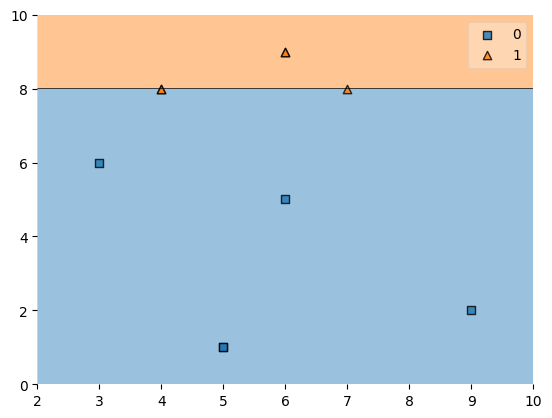

In [197]:
plot_decision_regions(np.array(x),np.array(y),clf=clf2)
plt.savefig('CLF2.png')

[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.625, 0.5, '  False')]

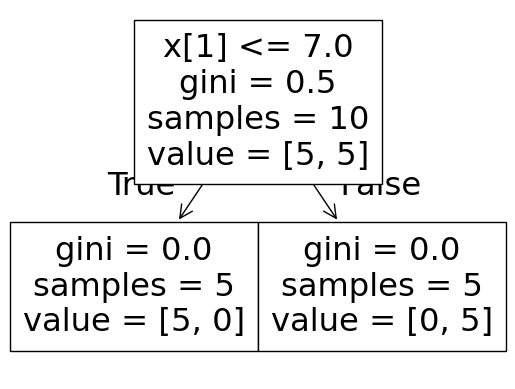

In [198]:
plot_tree(clf2)

In [199]:
second_df['y_pred']=clf2.predict(x)
second_df

,X1,X2,weights,label,y_pred
0,6,9,0.1,1,1
1,9,2,0.1,0,0
2,7,8,0.1,1,1
3,4,8,0.1,1,1
4,4,8,0.1,1,1
5,6,5,0.1,0,0
6,3,6,0.1,0,0
7,5,1,0.1,0,0
8,6,9,0.1,1,1
9,5,1,0.1,0,0


# Starting Second Time

In [200]:
m_classified2,w_classified2=classification(second_df)

Empty DataFrame
Columns: [X1, X2, weights, label, y_pred]
Index: []

--------Classified-----------

   X1  X2  weights  label  y_pred
0   6   9      0.1      1       1
1   9   2      0.1      0       0
2   7   8      0.1      1       1
3   4   8      0.1      1       1
4   4   8      0.1      1       1
5   6   5      0.1      0       0
6   3   6      0.1      0       0
7   5   1      0.1      0       0
8   6   9      0.1      1       1
9   5   1      0.1      0       0


In [201]:
query=np.array([1,5]).reshape(1,2)
clf.predict(query)

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [202]:
alpha1*1

0.4236489304078875

# Since ONly one decision tree was required so FInal Prediction 

In [203]:
np.sign(alpha1*1)

1.0